# Demo, 2023-03-07

In [1]:
%load_ext autoreload
%autoreload 2

import spatialdata as sd

import spatialdata_plot

/Users/harald/Documents/opt/spatdata/env/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/harald/Documents/opt/spatdata/env/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


## Load data from spatialdata-sandbox
The mibitof data contains:
- 3 coordinate systems (`point8`, `point16`, `point23`)
- each coordinate systems contains an associated image (`XXX_image`) and a label (`XXX_labels`)
- a table containing annotations for the three labels

In [2]:
data_dir = "../../../spatialdata-sandbox/mibitof/data.zarr"

mibi = sd.read_zarr(data_dir)

mibi

SpatialData object with:
├── Images
│     ├── 'point8_image': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point16_image': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point23_image': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': SpatialImage[yx] (1024, 1024)
│     ├── 'point16_labels': SpatialImage[yx] (1024, 1024)
│     └── 'point23_labels': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (3309, 36)
with coordinate systems:
▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

## Use `sdata.pp.get_elements()` to subset data
- Can be used to filter by `coordinate_systems`, `images`, `labels`, `polygons`, etc
- Accepts the unique keys as a list of strings

### Select two of the three coordinate systems (retains all members)

In [3]:
mibi.pp.get_elements(["point8", "point16"])

SpatialData object with:
├── Images
│     ├── 'point8_image': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point16_image': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': SpatialImage[yx] (1024, 1024)
│     └── 'point16_labels': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 2068 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (2068, 36)
with coordinate systems:
▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)

### Select only one image (only retains its coordinate system)

In [4]:
mibi.pp.get_elements(["point8_image"])

SpatialData object with:
└── Images
      └── 'point8_image': SpatialImage[cyx] (3, 1024, 1024)
with coordinate systems:
▸ 'point8', with elements:
        point8_image (Images)

In [5]:
mibi.pp.get_elements(["point8_labels"])

SpatialData object with:
├── Labels
│     └── 'point8_labels': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 1045 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (1045, 36)
with coordinate systems:
▸ 'point8', with elements:
        point8_labels (Labels)

### Pick and choose from different coordinate systems (is that useful?)

In [6]:
mibi.pp.get_elements(["point8_image", "point16_labels"])

SpatialData object with:
├── Images
│     └── 'point8_image': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     └── 'point16_labels': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 1023 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (1023, 36)
with coordinate systems:
▸ 'point8', with elements:
        point8_image (Images)
▸ 'point16', with elements:
        point16_labels (Labels)

## Plot all labels contained in the object

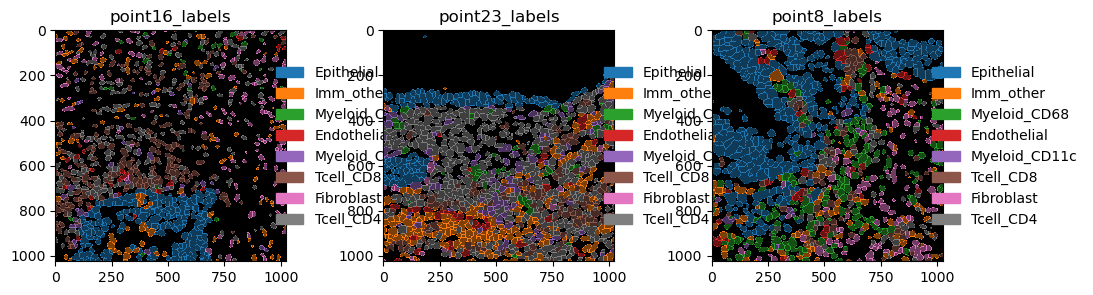

In [7]:
_ = mibi.pl.render_labels(instance_key="cell_id", color_key="Cluster").pl.show()

## Filter data and then plot remaining labels

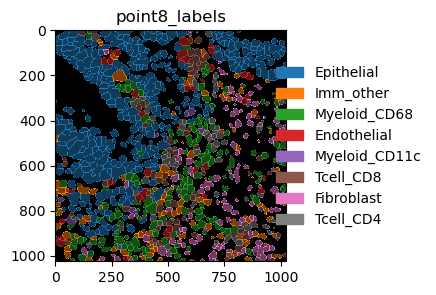

In [8]:
_ = mibi.pp.get_elements("point8").pl.render_labels(instance_key="cell_id", color_key="Cluster").pl.show()